## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### set the graph size

In [2]:
plt.rcParams["figure.figsize"] = (15,6)

## Import the dataframe

In [3]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(path, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Analysing Individual Feature Paterns Using Visualisation

### Analysing what type of variable we are dealing with

In [4]:
df.dtypes.to_frame()

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


#### What is the data type of column "peak-rpm"

In [5]:
print(df["peak-rpm"].dtypes)

object


In [6]:
# replace ? with NAN in all columns of df
df.replace("?", np.nan, inplace=True)

In [7]:
# convert data type from object to float
df["peak-rpm"] = df["peak-rpm"].astype(float)

## Correlation Analysis

In [8]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,peak-rpm,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.274573,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.361052,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.287325,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.219957,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.322272,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.266306,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.244618,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.436221,0.324701,0.265201
peak-rpm,0.274573,-0.361052,-0.287325,-0.219957,-0.322272,-0.266306,-0.244618,-0.436221,1.000000,-0.113788,-0.054257
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,-0.113788,1.000000,0.971337


#### Find the correlation between the following columns: bore, stroke,compression-ratio and horsepower

In [9]:
df_corr = df[["bore", "stroke", "compression-ratio", "horsepower"]].astype(float)
df_corr

,bore,stroke,compression-ratio,horsepower
0,3.47,2.68,9.0,111.0
1,3.47,2.68,9.0,111.0
2,2.68,3.47,9.0,154.0
3,3.19,3.40,10.0,102.0
4,3.19,3.40,8.0,115.0
...,...,...,...,...
200,3.78,3.15,9.5,114.0
201,3.78,3.15,8.7,160.0
202,3.58,2.87,8.8,134.0
203,3.01,3.40,23.0,106.0


In [10]:
# data types evaluation of the newly created dataset
df_corr.dtypes

bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
dtype: object

### Correlation values analysis

In [11]:
df_corr.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055909,0.005203,0.577273
stroke,-0.055909,1.000000,0.186170,0.090254
compression-ratio,0.005203,0.186170,1.000000,-0.205874
horsepower,0.577273,0.090254,-0.205874,1.000000


## Positive Linear Relationship

#### This tipe of evaluation is taking place between variable that are int or float and a between ranges, continuous numbers.

In [12]:
print(df["engine-size"].dtypes)
print(df["price"].dtypes)

int64
object


In [13]:
df["price"] = df["price"].astype(float)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 53187.30329578062)

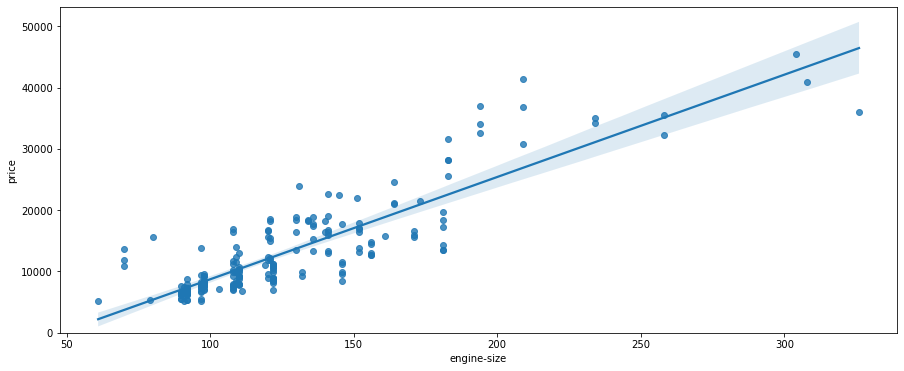

In [14]:
# Engine size as potential predictor variable of price
x = df["engine-size"]
y = df["price"]
sns.regplot(x, y, data = df)
plt.ylim(0,)


#### Analyse the correlation between engine-size and price

In [15]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### Analyse highway mpg as potential predictor of price

In [16]:
print(df["highway-mpg"].dtypes)

int64


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

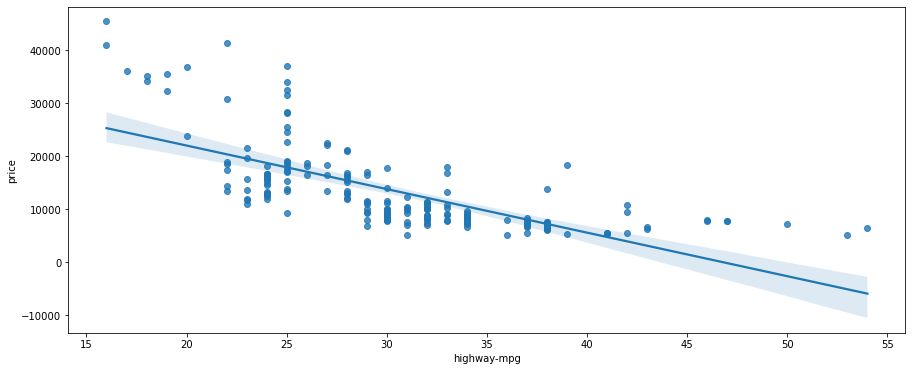

In [17]:
sns.regplot(x = df["highway-mpg"], y = df["price"], data = df)

#### Examine the correlation between the two variables

In [18]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Analyse a weak relationship between two variables

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

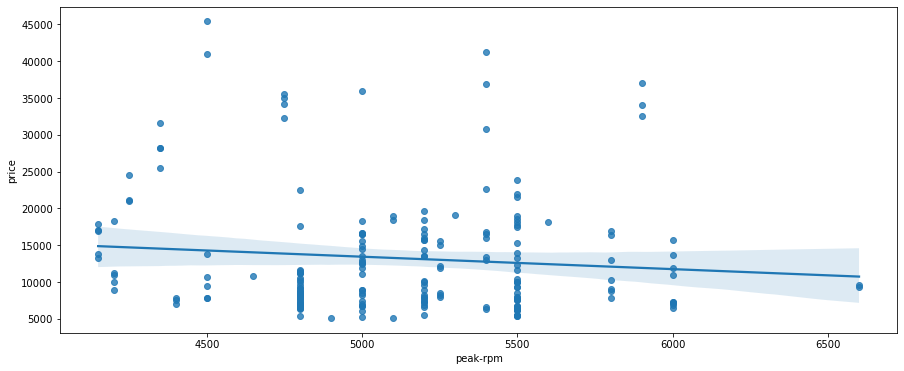

In [19]:
sns.regplot(x= df["peak-rpm"], y = df["price"])

In [20]:
df[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101649
price,-0.101649,1.000000


#### Find the correlation between price and stroke variables

In [21]:
print(df["stroke"].dtypes)

object


<AxesSubplot:xlabel='stroke', ylabel='price'>

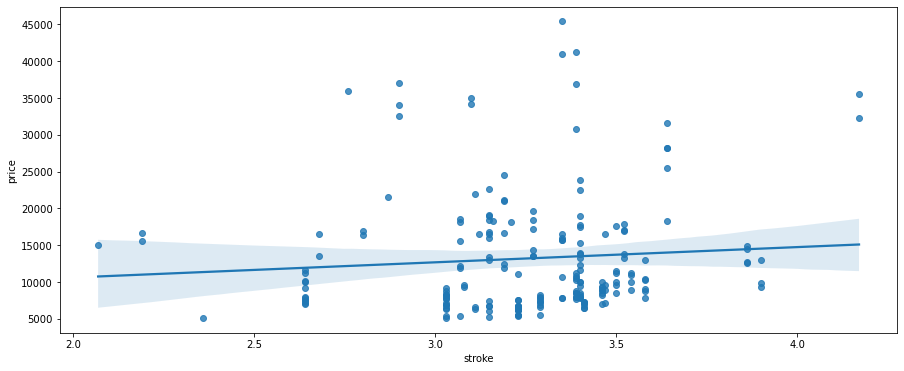

In [22]:

sns.regplot(x = df["stroke"].astype(float), y = "price", data = df)

In [23]:
df["stroke"] = df["stroke"].astype(float)

In [24]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


## Categorical variables

Variables that describe a characteristic of a data unitand are selected from a small number of categories.
Are represented by boxplot graphs

<AxesSubplot:xlabel='body-style', ylabel='price'>

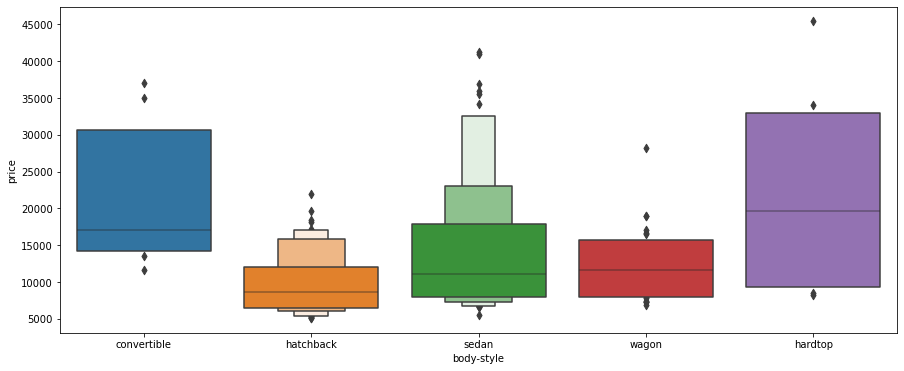

In [25]:
sns.boxenplot(x = "body-style", y = "price", data = df)

body-style would not be a good predictor because price overlaps alond diffrent categories

<AxesSubplot:xlabel='engine-location', ylabel='price'>

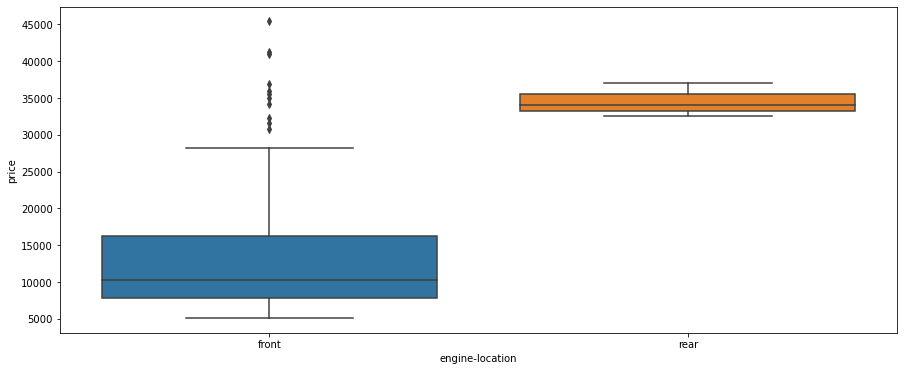

In [26]:
sns.boxplot(x = "engine-location", y = "price", data = df)

in this case engine location is a good predictor for price ac the price does not overlap in these two categories

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

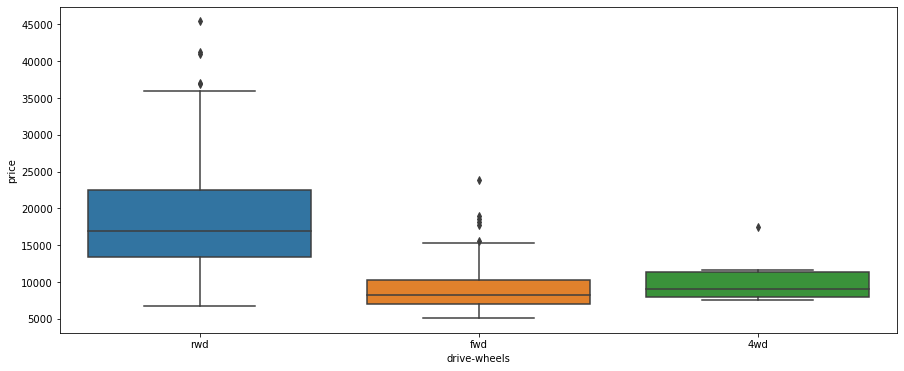

In [27]:
sns.boxplot(x = "drive-wheels", y = "price", data = df)

this variable could be a good predictor of price

## Descriptive statistics

This will evaluate: 
* the count
* standard deviation
* mean
* minimum value
* maximum value
* IQR - interqortile range 25%,50%,75%


In [28]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255423,10.142537,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.316717,3.972040,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000


In [29]:
df.describe(include="object")

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,horsepower
count,164,205,205,205,203,205,205,205,205,205,205,201,203
unique,51,22,2,2,2,5,3,2,7,7,8,38,59
top,161,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,68
freq,11,32,185,168,114,96,120,202,148,159,94,23,19


### Counting using value_counts()

In [30]:
df["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


In [31]:
drive_wheel_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheel_counts

,drive-wheels
fwd,120
rwd,76
4wd,9


##### rename the newly created column

In [32]:
drive_wheel_counts.rename(columns = {"drive-wheels":"value_counts"}, inplace=True)
drive_wheel_counts

,value_counts
fwd,120
rwd,76
4wd,9


In [33]:
engine_loc_count = df["engine-location"].value_counts().to_frame()
engine_loc_count.rename(columns = {"engine-location":"value_counts"}, inplace = True)
engine_loc_count.index.name = "engine-location"
engine_loc_count

,value_counts
engine-location,
front,202
rear,3


## Basics of grouping

Use unique to getthe categories

In [34]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Lets suppose that we wnt to know on average which type of drive-wheel is most valuable, we can group by drive-wheel and average them

In [37]:
df_group_one = df[["drive-wheels", "body-style", "price"]]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [39]:
df_group_one = df_group_one.groupby(["drive-wheels"],as_index = False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


## Grouping by multiple varibles

In [44]:
df_gp_test = df[["drive-wheels","body-style","price"]]
df_gp_test

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [46]:
grouped_test_1 = df_gp_test.groupby(["drive-wheels","body-style"], as_index = False).mean()
grouped_test_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [47]:
grouped_pivot = grouped_test_1.pivot(index = "drive-wheels", columns="body-style")
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [48]:
grouped_pivot.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Create a heatmap 

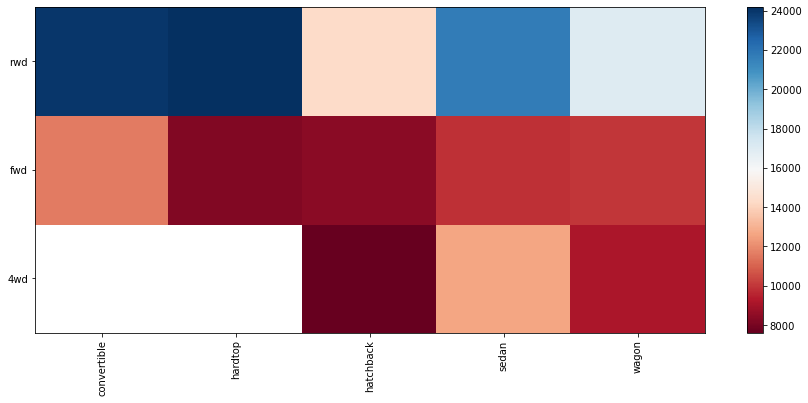

In [52]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap="RdBu")

# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move tick to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor = False)

# insert labels
ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)


## Corelation and Causation

In [53]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.008965,-0.178515,0.274573,-0.035823,0.034606,-0.082391
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.161477,0.249786,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.129739,0.158414,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.182956,0.181129,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,-0.056999,0.261214,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.168929,0.151362,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.206675,0.028971,-0.244618,-0.653658,-0.677470,0.872335
stroke,-0.008965,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,1.000000,0.186170,-0.071493,-0.042906,-0.044528,0.082310
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.186170,1.000000,-0.436221,0.324701,0.265201,0.071107
peak-rpm,0.274573,-0.361052,-0.287325,-0.219957,-0.322272,-0.266306,-0.244618,-0.071493,-0.436221,1.000000,-0.113788,-0.054257,-0.101649


### Calculate Pearson Correlation Coeficient

In [54]:
from scipy import stats

In [56]:
df[["wheel-base", "price"]]

,wheel-base,price
0,88.6,13495.0
1,88.6,16500.0
2,94.5,16500.0
3,99.8,13950.0
4,99.4,17450.0
...,...,...
200,109.1,16845.0
201,109.1,19045.0
202,109.1,21485.0
203,109.1,22470.0


In [60]:
df["price"].isnull().sum()

4

In [63]:
df["price"].isna().sum()

4

In [61]:
df_mean = df["price"].mean()

In [66]:
df["price"].fillna(df["price"].mean(), inplace = True)

In [102]:
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])
print("The Correlation Coeficient is:", pearson_coef, "with P-value of P", p_value)

The Correlation Coeficient is: 0.5831681499789547 with P-value of P 4.527625545686765e-20


### Calculate pearson coef and p value between horsepower and price

In [85]:
df["horsepower"].isna().value_counts()

False    203
True       2
Name: horsepower, dtype: int64

In [79]:
print(df["horsepower"].dtype)

object


In [97]:
df["horsepower"] = df["horsepower"].astype(float)

In [98]:
df["horsepower"].dropna(inplace = True)

In [99]:
df["horsepower"].fillna(df["horsepower"].mean(), inplace = True)

In [100]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"].astype(float), df["price"])
print("The Correlation Coeficient is:", pearson_coef, "with P-value of P", p_value)

The Correlation Coeficient is: 0.7579169537498176 with P-value of P 1.6076703978131245e-39


since the p < 0.001 means the correlation is statisticaly significant and the relationship is strong


### Pearson Coefficient and P value of width and price

In [103]:
corr_coef, p_value = stats.pearsonr(df["width"], df["price"])
print("The Correlation Coeficient is:", pearson_coef, "with P-value of P", p_value)

The Correlation Coeficient is: 0.5831681499789547 with P-value of P 3.214520483804664e-35


Pearson Coeff and p value of curb_weigth and price

In [105]:
corr_coef, p_value = stats.pearsonr(df["curb-weight"], df["price"])
print("The Correlation Coeficient is:", pearson_coef, "with P-value of P", p_value)

The Correlation Coeficient is: 0.5831681499789547 with P-value of P 2.86633210702689e-51


Pearson Coeff and p value of bore and price

In [110]:
print(df["bore"].dtypes)

object


In [111]:
df["bore"] = df["bore"].astype(float)

In [113]:
df["bore"].isnull().sum()

4

In [114]:
df["bore"]

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: float64

In [115]:
df["bore"].fillna(df["bore"].mean(), inplace = True)

In [116]:
corr_coef, p_val = stats.pearsonr(df["bore"], df["price"])
print("The Correlation Coeficient is:", pearson_coef, "with P-value of P", p_value)

The Correlation Coeficient is: 0.5831681499789547 with P-value of P 2.86633210702689e-51


## ANOVA Analysis of Variance

determines if there are significant differences between mean of separate groups
f-test score:anova asumes that the mean of all groups are the same. calculates how much the mean varies from the asumption value.
a large number means there are big diferences between the means.

In [121]:
group_test_2 = df_gp_test[["drive-wheels","price"]].groupby(["drive-wheels"])
group_test_2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
9,4wd,NaN


In [119]:
df_gp_test

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [120]:
group_test_2.get_group("4wd")["price"]

4      17450.0
9          NaN
140     7603.0
144     9233.0
145    11259.0
148     8013.0
149    11694.0
154     7898.0
155     8778.0
Name: price, dtype: float64

#### Calculate the f-score

In [123]:
group_test_2.get_group("fwd")["price"]

3      13950.0
5      15250.0
6      17710.0
7      18920.0
8      23875.0
        ...   
189    11595.0
190     9980.0
191    13295.0
192    13845.0
193    12290.0
Name: price, Length: 120, dtype: float64

In [132]:
group_test_2.get_group("4wd")["price"].fillna(0)

4      17450.0
9          0.0
140     7603.0
144     9233.0
145    11259.0
148     8013.0
149    11694.0
154     7898.0
155     8778.0
Name: price, dtype: float64

In [133]:
# ANOVA
f_val, p_val = stats.f_oneway(group_test_2.get_group("fwd")["price"], group_test_2.get_group("rwd")["price"], group_test_2.get_group("4wd")["price"])
print("ANOVA results: F=", f_val, "P = ", p_val)

ANOVA results: F= nan P =  nan


In [134]:
f_val, p_val = stats.f_oneway(group_test_2.get_group("fwd")["price"], group_test_2.get_group("rwd")["price"])
print("ANOVA results: F=", f_val, "P = ", p_val)

ANOVA results: F= nan P =  nan


In [135]:
f_val, p_val = stats.f_oneway(group_test_2.get_group("4wd")["price"], group_test_2.get_group("fwd")["price"])
print("ANOVA results: F=", f_val, "P = ", p_val)

ANOVA results: F= nan P =  nan


## Conclusion:
We now have a better idea of what data looks like and which var are more important to take into account predicting the car price:
Continuous numerical variables:
* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City mpg
* Highway mpg
* Wheel base
* Bore

categorical variables:
drive-wheels